In [38]:
# Import necessary packages
import numpy as np
import matplotlib
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns

In [39]:
# Get all CBSA
df_site = pd.read_csv('site_details-site.csv')
df_facility = pd.read_excel('CBSA Public Summary Tables 6102020.xlsx', sheet_name = 'Buildings')

In [40]:
# Get all UrbanBEM results
df_results= pd.read_csv('cbsa_results_05.25.2022.csv')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for month in months:
    df_results[month + '_Electricity_J'] *= 2.77778e-7
    df_results[month + '_Gas_J'] *= 9.48043e-9
    df_results = df_results.rename({month + '_Electricity_J': month + '_Electricity_kWh',
                                    month + '_Gas_J': month + '_Gas_therm'}, axis='columns')
df_results = df_results.sort_values(by = 'facility_id', ascending = True).reset_index(drop = True)
df_results

,facility_id,Jan_Electricity_kWh,Feb_Electricity_kWh,Mar_Electricity_kWh,Apr_Electricity_kWh,May_Electricity_kWh,Jun_Electricity_kWh,Jul_Electricity_kWh,Aug_Electricity_kWh,Sep_Electricity_kWh,...,Mar_Gas_therm,Apr_Gas_therm,May_Gas_therm,Jun_Gas_therm,Jul_Gas_therm,Aug_Gas_therm,Sep_Gas_therm,Oct_Gas_therm,Nov_Gas_therm,Dec_Gas_therm
0,2517,6851.280253,5712.971577,5636.590826,4646.594502,5211.025091,4791.710167,5007.769510,5206.538824,4800.977432,...,388.524637,213.911488,237.296176,42.920771,10.775943,13.407637,93.471347,166.488917,331.852002,438.409953
1,2571,11127.780856,9582.080456,10956.148213,11297.963707,13633.082240,15477.379138,18128.266328,21036.541001,15465.658297,...,254.900066,148.454472,78.807926,33.649506,20.510324,13.562539,34.607471,111.462287,300.581737,641.770273
2,2657,7668.921530,6929.207487,7776.263970,7264.669816,8134.982419,10318.577035,10953.921651,10698.864320,9391.150104,...,299.084082,229.144949,46.387913,0.693013,0.148236,0.266658,5.282055,102.160215,218.206295,476.956216
3,2683,6582.027088,5951.216852,7120.113300,7086.873287,8346.937684,8894.551300,9778.354797,10795.318322,9095.706246,...,1018.034066,951.712758,997.650333,958.113155,968.836056,991.229113,945.027303,987.954864,976.360232,1029.273981
4,2770,6693.296478,5655.412049,5260.718401,4630.950903,4567.060718,4308.195609,4359.676300,4624.662487,4249.818033,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,8508,10134.886683,9089.468518,10139.089925,9685.245433,10517.118875,10652.238265,11442.375381,12584.754578,10797.300442,...,268.906022,187.159758,79.786493,33.090054,18.041667,12.697794,16.824887,84.020655,232.765473,458.911863
912,8509,5237.707825,4713.584426,5380.219747,5228.606840,5755.962285,5891.663714,6376.097958,6870.817222,6042.244554,...,417.588906,385.383333,392.138267,373.590199,378.063270,384.473275,368.478854,390.438467,401.553899,448.092601
913,8510,246732.892803,216405.608443,240375.240654,228535.712135,245852.946174,263757.072827,306597.558718,297713.796263,260125.454873,...,25597.815699,13170.450960,12354.886042,3263.404713,1807.901483,2231.597380,5871.935937,10133.562777,22087.346360,34177.949917
914,8511,101358.558980,98977.113036,109042.812290,102117.058457,107718.300950,126403.385418,130540.460724,128676.847170,112562.155717,...,12654.504420,11435.161774,5313.048065,1321.040201,1101.660939,1259.953710,2186.645760,7842.034535,11363.303275,16636.220122


In [41]:
sites = []
facilities = []
areas = []
building_types = []
for facility in df_facility['facility_id']:
    site = df_facility[df_facility['facility_id'] == facility][['site_reference_number', 'facility_id', 'total_building_area', 'primary_building_type_facility']]
    if len(site) == 1:
        sites.append(site.site_reference_number.values[0])
        facilities.append(site.facility_id.values[0])
        areas.append(site.total_building_area.values[0])
        if site.primary_building_type_facility.values[0] == 'Retail/Service':
            site.primary_building_type_facility.values[0] = 'Retail-Service'
        building_types.append(site.primary_building_type_facility.values[0])

In [42]:
gas_EUI_all = pd.DataFrame()
electric_EUI_all = pd.DataFrame()
for site in sites:
    gas_EUI = df_site[df_site['site_reference_number'] == site][['jan_weather_normalized_gas_eui_therms_per_sqft',
                                                   'feb_weather_normalized_gas_eui_therms_per_sqft',
                                                   'mar_weather_normalized_gas_eui_therms_per_sqft',
                                                   'apr_weather_normalized_gas_eui_therms_per_sqft',
                                                   'may_weather_normalized_gas_eui_therms_per_sqft',
                                                   'jun_weather_normalized_gas_eui_therms_per_sqft',
                                                   'jul_weather_normalized_gas_eui_therms_per_sqft',
                                                   'aug_weather_normalized_gas_eui_therms_per_sqft',
                                                   'sep_weather_normalized_gas_eui_therms_per_sqft',
                                                   'oct_weather_normalized_gas_eui_therms_per_sqft',
                                                   'nov_weather_normalized_gas_eui_therms_per_sqft',
                                                   'dec_weather_normalized_gas_eui_therms_per_sqft']]
    electric_EUI = df_site[df_site['site_reference_number'] == site][['jan_weather_normalized_electric_eui_kwh_per_sqft',
                                                        'feb_weather_normalized_electric_eui_kwh_per_sqft',
                                                        'mar_weather_normalized_electric_eui_kwh_per_sqft',
                                                        'apr_weather_normalized_electric_eui_kwh_per_sqft',
                                                        'may_weather_normalized_electric_eui_kwh_per_sqft',
                                                        'jun_weather_normalized_electric_eui_kwh_per_sqft',
                                                        'jul_weather_normalized_electric_eui_kwh_per_sqft',
                                                        'aug_weather_normalized_electric_eui_kwh_per_sqft',
                                                        'sep_weather_normalized_electric_eui_kwh_per_sqft',
                                                        'oct_weather_normalized_electric_eui_kwh_per_sqft',
                                                        'nov_weather_normalized_electric_eui_kwh_per_sqft',
                                                        'dec_weather_normalized_electric_eui_kwh_per_sqft']]
    gas_EUI = gas_EUI.reset_index(drop=True)
    electric_EUI = electric_EUI.reset_index(drop=True)
    gas_EUI_all = pd.concat([gas_EUI_all, gas_EUI], axis = 'index').reset_index(drop = True)
    electric_EUI_all = pd.concat([electric_EUI_all, electric_EUI], axis = 'index').reset_index(drop = True)
    

In [43]:
df_monthly = pd.DataFrame()
df_monthly = pd.concat([df_monthly, electric_EUI_all, gas_EUI_all], axis = 'columns')
df_monthly['site_reference_number'] = sites
df_monthly['facility_id'] = facilities
df_monthly['total_building_area'] = areas
df_monthly['primary_building_type_facility'] = building_types
col = df_monthly.pop('facility_id')
df_monthly.insert(0, col.name, col)
month_lower = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
for month in month_lower:
    df_monthly = df_monthly.rename({month + '_weather_normalized_electric_eui_kwh_per_sqft': month + '_elec_eui',
                                    month + '_weather_normalized_gas_eui_therms_per_sqft': month + '_gas_eui'}, axis='columns')
df_monthly

,facility_id,jan_elec_eui,feb_elec_eui,mar_elec_eui,apr_elec_eui,may_elec_eui,jun_elec_eui,jul_elec_eui,aug_elec_eui,sep_elec_eui,...,jun_gas_eui,jul_gas_eui,aug_gas_eui,sep_gas_eui,oct_gas_eui,nov_gas_eui,dec_gas_eui,site_reference_number,total_building_area,primary_building_type_facility
0,2517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13521,6200,Warehouse
1,2571,1.360123,1.309504,1.253471,1.140126,1.077537,1.000584,0.994094,0.968190,0.989742,...,0.005306,0.000081,0.000000,0.007996,0.021089,0.033163,0.037642,20864,15100,Assembly
2,2657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13581,9700,Retail-Service
3,2683,3.919056,3.878100,3.851792,3.962884,3.822859,3.971726,4.698354,4.346590,3.836184,...,0.194901,0.164014,0.165605,0.214629,0.287242,0.368898,0.397893,18035,4269,Restaurant
4,2770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51212,2480,Assembly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,8508,2.945555,2.921501,2.919031,2.900396,2.891456,3.038433,3.248496,3.116231,2.936722,...,0.034974,0.031101,0.031793,0.036064,0.049863,0.073872,0.082125,16380,8910,Grocery
928,8509,2.945555,2.921501,2.919031,2.900396,2.891456,3.038433,3.248496,3.116231,2.936722,...,0.034974,0.031101,0.031793,0.036064,0.049863,0.073872,0.082125,16380,2500,Restaurant
929,8510,2.781686,2.781686,2.781686,2.781686,2.807622,2.974182,3.229213,3.637160,2.793192,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14169,203178,Hospital
930,8511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10178,86576,Mixed Commercial


In [44]:
df_monthly_subset = df_monthly.loc[df_monthly['facility_id'].isin(df_results.facility_id)].reset_index(drop = True)
df_monthly_subset = df_monthly_subset.loc[df_monthly_subset['jan_elec_eui'].isna() == False].reset_index(drop = True)
df_results = df_results.loc[df_results['facility_id'].isin(df_monthly_subset.facility_id)].reset_index(drop = True)
df_results = df_results.drop(columns = ['facility_id'])
df_monthly_subset

,facility_id,jan_elec_eui,feb_elec_eui,mar_elec_eui,apr_elec_eui,may_elec_eui,jun_elec_eui,jul_elec_eui,aug_elec_eui,sep_elec_eui,...,jun_gas_eui,jul_gas_eui,aug_gas_eui,sep_gas_eui,oct_gas_eui,nov_gas_eui,dec_gas_eui,site_reference_number,total_building_area,primary_building_type_facility
0,2571,1.360123,1.309504,1.253471,1.140126,1.077537,1.000584,0.994094,0.968190,0.989742,...,0.005306,0.000081,0.000000,0.007996,0.021089,0.033163,0.037642,20864,15100,Assembly
1,2683,3.919056,3.878100,3.851792,3.962884,3.822859,3.971726,4.698354,4.346590,3.836184,...,0.194901,0.164014,0.165605,0.214629,0.287242,0.368898,0.397893,18035,4269,Restaurant
2,2946,0.210774,0.205388,0.201721,0.200362,0.195107,0.198580,0.206416,0.213174,0.192923,...,0.010361,0.005045,0.004442,0.014342,0.025598,0.034270,0.037392,21254,16710,Assembly
3,3102,0.835933,0.748238,0.691799,0.611203,0.532059,0.439788,0.370155,0.358331,0.436750,...,0.013038,0.008535,0.007770,0.012841,0.022993,0.029537,0.036802,11714,16710,Lodging
4,3112,1.252561,1.206094,1.206931,1.109372,1.021981,0.930056,0.972377,0.939800,0.931832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59115,6000,Warehouse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,8503,5.106282,5.106282,5.106282,5.108488,5.124802,5.513240,6.582127,6.366424,5.217804,...,0.150284,0.143737,0.143737,0.164499,0.247623,0.321077,0.379091,15067,80000,Hospital
426,8504,2.093418,1.818353,1.869229,1.369732,1.085501,0.536285,0.186872,0.123488,0.543688,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12508,4494,Warehouse
427,8508,2.945555,2.921501,2.919031,2.900396,2.891456,3.038433,3.248496,3.116231,2.936722,...,0.034974,0.031101,0.031793,0.036064,0.049863,0.073872,0.082125,16380,8910,Grocery
428,8509,2.945555,2.921501,2.919031,2.900396,2.891456,3.038433,3.248496,3.116231,2.936722,...,0.034974,0.031101,0.031793,0.036064,0.049863,0.073872,0.082125,16380,2500,Restaurant


In [45]:
df_results

,Jan_Electricity_kWh,Feb_Electricity_kWh,Mar_Electricity_kWh,Apr_Electricity_kWh,May_Electricity_kWh,Jun_Electricity_kWh,Jul_Electricity_kWh,Aug_Electricity_kWh,Sep_Electricity_kWh,Oct_Electricity_kWh,...,Mar_Gas_therm,Apr_Gas_therm,May_Gas_therm,Jun_Gas_therm,Jul_Gas_therm,Aug_Gas_therm,Sep_Gas_therm,Oct_Gas_therm,Nov_Gas_therm,Dec_Gas_therm
0,11127.780856,9582.080456,10956.148213,11297.963707,13633.082240,15477.379138,18128.266328,21036.541001,15465.658297,11725.973575,...,254.900066,148.454472,78.807926,33.649506,20.510324,13.562539,34.607471,111.462287,300.581737,641.770273
1,6582.027088,5951.216852,7120.113300,7086.873287,8346.937684,8894.551300,9778.354797,10795.318322,9095.706246,7741.984093,...,1018.034066,951.712758,997.650333,958.113155,968.836056,991.229113,945.027303,987.954864,976.360232,1029.273981
2,9156.451964,7616.737127,9456.484011,9059.881042,13644.901743,25407.951181,27398.215724,25479.210384,19952.334864,11241.667966,...,786.516062,582.485942,167.288498,88.539001,89.689509,92.106564,104.746362,384.927904,722.277524,1440.645123
3,8898.691906,8064.632249,9036.561431,8415.544752,9643.334607,10084.711448,10921.757414,12904.831583,10111.723891,8990.889094,...,1932.683445,1640.413287,1384.854808,1134.230292,1028.102390,1049.683843,1053.533977,1497.028700,1961.415322,2416.394580
4,8567.967506,7697.544686,8555.451346,8174.147763,8738.050090,8650.167478,9104.937059,9634.223453,8674.834404,8519.734885,...,116.600551,76.815114,30.473783,11.745431,4.775131,3.761566,7.058688,51.941533,129.579965,219.407117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,86355.633636,77118.926350,86435.140747,83950.757172,92578.442580,96421.408164,106479.135244,119002.996575,94999.679181,87805.048774,...,5152.902661,3808.987273,1981.892366,823.979505,313.848256,240.470528,444.896775,2623.349751,5446.641407,8491.427694
426,4014.617358,3886.485742,4176.425064,3861.242987,3139.018846,2068.853063,2043.776702,2087.681806,2087.037560,3216.944149,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
427,10134.886683,9089.468518,10139.089925,9685.245433,10517.118875,10652.238265,11442.375381,12584.754578,10797.300442,10179.919825,...,268.906022,187.159758,79.786493,33.090054,18.041667,12.697794,16.824887,84.020655,232.765473,458.911863
428,5237.707825,4713.584426,5380.219747,5228.606840,5755.962285,5891.663714,6376.097958,6870.817222,6042.244554,5556.473601,...,417.588906,385.383333,392.138267,373.590199,378.063270,384.473275,368.478854,390.438467,401.553899,448.092601


In [46]:
df_CBSA_UrbanBEM = pd.concat([df_monthly_subset, df_results], axis = 'columns')
df_CBSA_UrbanBEM

,facility_id,jan_elec_eui,feb_elec_eui,mar_elec_eui,apr_elec_eui,may_elec_eui,jun_elec_eui,jul_elec_eui,aug_elec_eui,sep_elec_eui,...,Mar_Gas_therm,Apr_Gas_therm,May_Gas_therm,Jun_Gas_therm,Jul_Gas_therm,Aug_Gas_therm,Sep_Gas_therm,Oct_Gas_therm,Nov_Gas_therm,Dec_Gas_therm
0,2571,1.360123,1.309504,1.253471,1.140126,1.077537,1.000584,0.994094,0.968190,0.989742,...,254.900066,148.454472,78.807926,33.649506,20.510324,13.562539,34.607471,111.462287,300.581737,641.770273
1,2683,3.919056,3.878100,3.851792,3.962884,3.822859,3.971726,4.698354,4.346590,3.836184,...,1018.034066,951.712758,997.650333,958.113155,968.836056,991.229113,945.027303,987.954864,976.360232,1029.273981
2,2946,0.210774,0.205388,0.201721,0.200362,0.195107,0.198580,0.206416,0.213174,0.192923,...,786.516062,582.485942,167.288498,88.539001,89.689509,92.106564,104.746362,384.927904,722.277524,1440.645123
3,3102,0.835933,0.748238,0.691799,0.611203,0.532059,0.439788,0.370155,0.358331,0.436750,...,1932.683445,1640.413287,1384.854808,1134.230292,1028.102390,1049.683843,1053.533977,1497.028700,1961.415322,2416.394580
4,3112,1.252561,1.206094,1.206931,1.109372,1.021981,0.930056,0.972377,0.939800,0.931832,...,116.600551,76.815114,30.473783,11.745431,4.775131,3.761566,7.058688,51.941533,129.579965,219.407117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,8503,5.106282,5.106282,5.106282,5.108488,5.124802,5.513240,6.582127,6.366424,5.217804,...,5152.902661,3808.987273,1981.892366,823.979505,313.848256,240.470528,444.896775,2623.349751,5446.641407,8491.427694
426,8504,2.093418,1.818353,1.869229,1.369732,1.085501,0.536285,0.186872,0.123488,0.543688,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
427,8508,2.945555,2.921501,2.919031,2.900396,2.891456,3.038433,3.248496,3.116231,2.936722,...,268.906022,187.159758,79.786493,33.090054,18.041667,12.697794,16.824887,84.020655,232.765473,458.911863
428,8509,2.945555,2.921501,2.919031,2.900396,2.891456,3.038433,3.248496,3.116231,2.936722,...,417.588906,385.383333,392.138267,373.590199,378.063270,384.473275,368.478854,390.438467,401.553899,448.092601


In [47]:
for month in months:
    df_CBSA_UrbanBEM[month+'_Electricity_EUI'] = df_CBSA_UrbanBEM[month+'_Electricity_kWh'].div(df_CBSA_UrbanBEM['total_building_area'].values)
    df_CBSA_UrbanBEM[month+'_Gas_EUI'] = df_CBSA_UrbanBEM[month+'_Gas_therm'].div(df_CBSA_UrbanBEM['total_building_area'].values)

df_CBSA_UrbanBEM = df_CBSA_UrbanBEM.set_index('facility_id').fillna(0)

In [48]:
df_CBSA_UrbanBEM

,jan_elec_eui,feb_elec_eui,mar_elec_eui,apr_elec_eui,may_elec_eui,jun_elec_eui,jul_elec_eui,aug_elec_eui,sep_elec_eui,oct_elec_eui,...,Aug_Electricity_EUI,Aug_Gas_EUI,Sep_Electricity_EUI,Sep_Gas_EUI,Oct_Electricity_EUI,Oct_Gas_EUI,Nov_Electricity_EUI,Nov_Gas_EUI,Dec_Electricity_EUI,Dec_Gas_EUI
facility_id,,,,,,,,,,,,,,,,,,,,,
2571,1.360123,1.309504,1.253471,1.140126,1.077537,1.000584,0.994094,0.968190,0.989742,1.144902,...,1.393148,0.000898,1.024216,0.002292,0.776555,0.007382,0.698642,0.019906,0.696789,0.042501
2683,3.919056,3.878100,3.851792,3.962884,3.822859,3.971726,4.698354,4.346590,3.836184,4.115956,...,2.528770,0.232192,2.130641,0.221370,1.813536,0.231425,1.601673,0.228709,1.521559,0.241104
2946,0.210774,0.205388,0.201721,0.200362,0.195107,0.198580,0.206416,0.213174,0.192923,0.198725,...,1.524788,0.005512,1.194036,0.006268,0.672751,0.023036,0.523661,0.043224,0.512845,0.086215
3102,0.835933,0.748238,0.691799,0.611203,0.532059,0.439788,0.370155,0.358331,0.436750,0.593723,...,0.772282,0.062818,0.605130,0.063048,0.538054,0.089589,0.526819,0.117380,0.526715,0.144608
3112,1.252561,1.206094,1.206931,1.109372,1.021981,0.930056,0.972377,0.939800,0.931832,1.074542,...,1.605704,0.000627,1.445806,0.001176,1.419956,0.008657,1.375057,0.021597,1.405606,0.036568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8503,5.106282,5.106282,5.106282,5.108488,5.124802,5.513240,6.582127,6.366424,5.217804,5.109108,...,1.487537,0.003006,1.187496,0.005561,1.097563,0.032792,1.042102,0.068083,1.053791,0.106143
8504,2.093418,1.818353,1.869229,1.369732,1.085501,0.536285,0.186872,0.123488,0.543688,1.253406,...,0.464549,0.000000,0.464405,0.000000,0.715831,0.000000,0.853481,0.000000,0.927235,0.000000
8508,2.945555,2.921501,2.919031,2.900396,2.891456,3.038433,3.248496,3.116231,2.936722,2.902686,...,1.412430,0.001425,1.211818,0.001888,1.142527,0.009430,1.102432,0.026124,1.117467,0.051505


In [ ]:
df_CBSA_UrbanBEM.to_csv('CBSA_UrbanBEM_05.25.2022.csv')

Text(0, 0.5, 'UrbanBEM Gas EUI (kWh/sqft)')

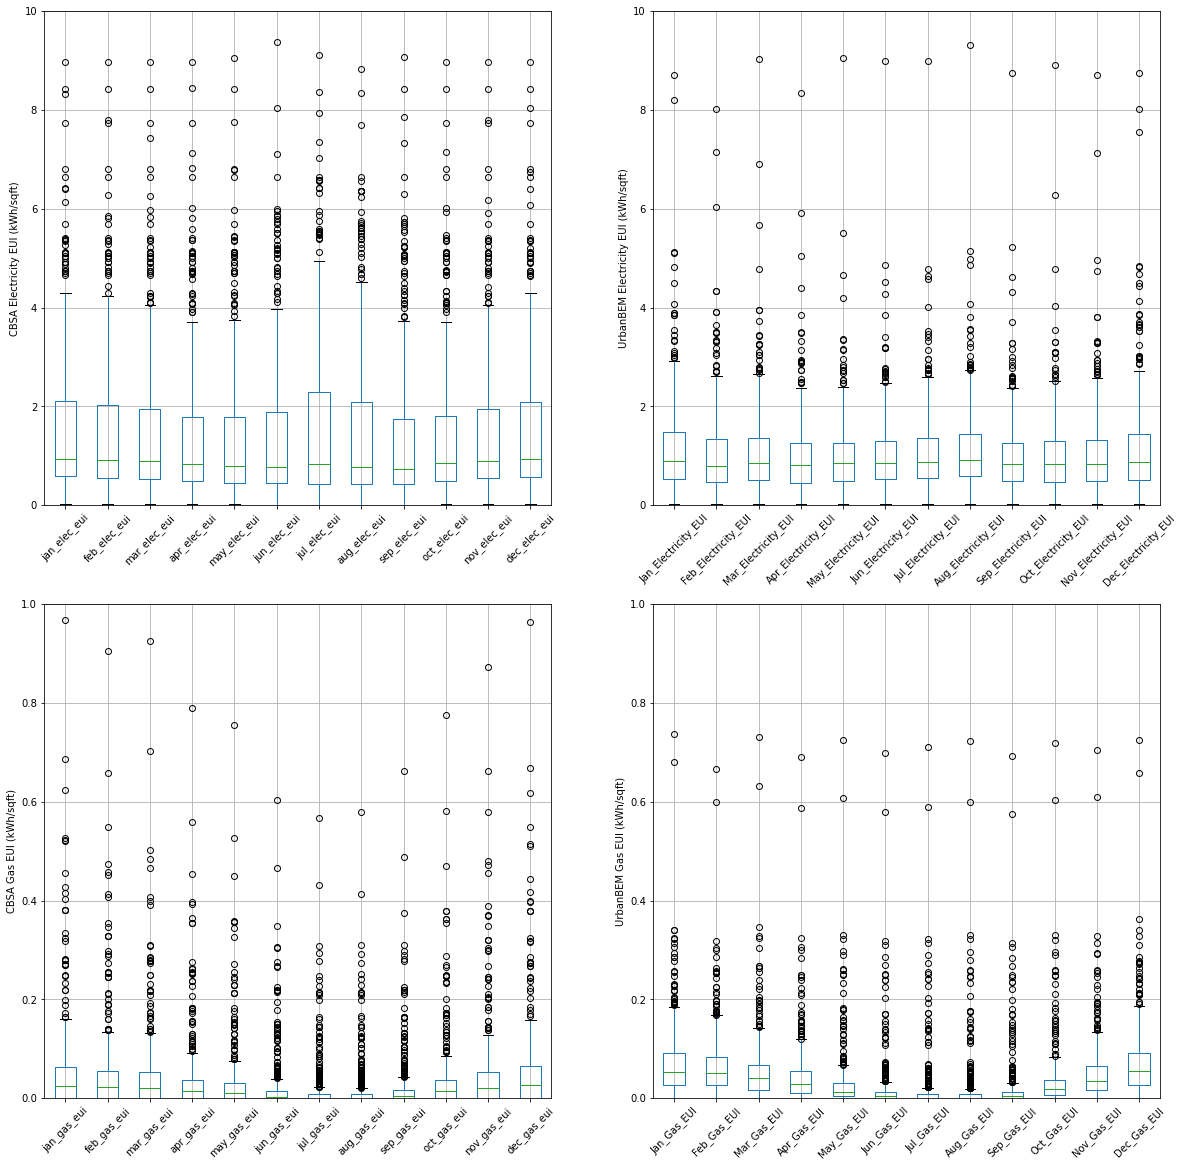

In [49]:
cbsa_elec_columns = ['jan_elec_eui', 'feb_elec_eui', 'mar_elec_eui', 'apr_elec_eui',
                              'may_elec_eui', 'jun_elec_eui', 'jul_elec_eui', 'aug_elec_eui',
                              'sep_elec_eui', 'oct_elec_eui', 'nov_elec_eui', 'dec_elec_eui']
cbsa_gas_columns = ['jan_gas_eui', 'feb_gas_eui', 'mar_gas_eui', 'apr_gas_eui',
                              'may_gas_eui', 'jun_gas_eui', 'jul_gas_eui', 'aug_gas_eui',
                              'sep_gas_eui', 'oct_gas_eui', 'nov_gas_eui', 'dec_gas_eui']
urbanbem_elec_columns = ['Jan_Electricity_EUI', 'Feb_Electricity_EUI', 'Mar_Electricity_EUI', 'Apr_Electricity_EUI',
                              'May_Electricity_EUI', 'Jun_Electricity_EUI', 'Jul_Electricity_EUI', 'Aug_Electricity_EUI',
                              'Sep_Electricity_EUI', 'Oct_Electricity_EUI', 'Nov_Electricity_EUI', 'Dec_Electricity_EUI']
urbanbem_gas_columns = ['Jan_Gas_EUI', 'Feb_Gas_EUI', 'Mar_Gas_EUI', 'Apr_Gas_EUI',
                              'May_Gas_EUI', 'Jun_Gas_EUI', 'Jul_Gas_EUI', 'Aug_Gas_EUI',
                              'Sep_Gas_EUI', 'Oct_Gas_EUI', 'Nov_Gas_EUI', 'Dec_Gas_EUI']

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,20))

box_plot_electric_data = df_CBSA_UrbanBEM.boxplot(column=cbsa_elec_columns, rot = 45, ax = axes[0, 0])
df_CBSA_UrbanBEM.boxplot(column=urbanbem_elec_columns, rot = 45, ax = axes[0, 1])
box_plot_gas_data = df_CBSA_UrbanBEM.boxplot(column=cbsa_gas_columns, rot = 45, ax = axes[1, 0])
box_plot_gas_sim = df_CBSA_UrbanBEM.boxplot(column=urbanbem_gas_columns, rot = 45, ax = axes[1, 1])
axes[0, 1].set_ylim(0, 10)
axes[0, 0].set_ylim(0, 10)
axes[1, 1].set_ylim(0, 1)
axes[1, 0].set_ylim(0, 1)
axes[0, 0].set_ylabel('CBSA Electricity EUI (kWh/sqft)')
axes[0, 1].set_ylabel('UrbanBEM Electricity EUI (kWh/sqft)')
axes[1, 0].set_ylabel('CBSA Gas EUI (kWh/sqft)')
axes[1, 1].set_ylabel('UrbanBEM Gas EUI (kWh/sqft)')

In [51]:
for month in months:
    df_CBSA_UrbanBEM[month + '_elec_diff'] = abs((df_CBSA_UrbanBEM[month.lower() + '_elec_eui'] - df_CBSA_UrbanBEM[month + '_Electricity_EUI']))
    df_CBSA_UrbanBEM[month + '_gas_diff'] = abs((df_CBSA_UrbanBEM[month.lower() + '_gas_eui'] - df_CBSA_UrbanBEM[month + '_Gas_EUI']))

In [ ]:
df_CBSA_UrbanBEM.to_csv('aaa.csv')

Text(0.5, 1.0, 'Gas')

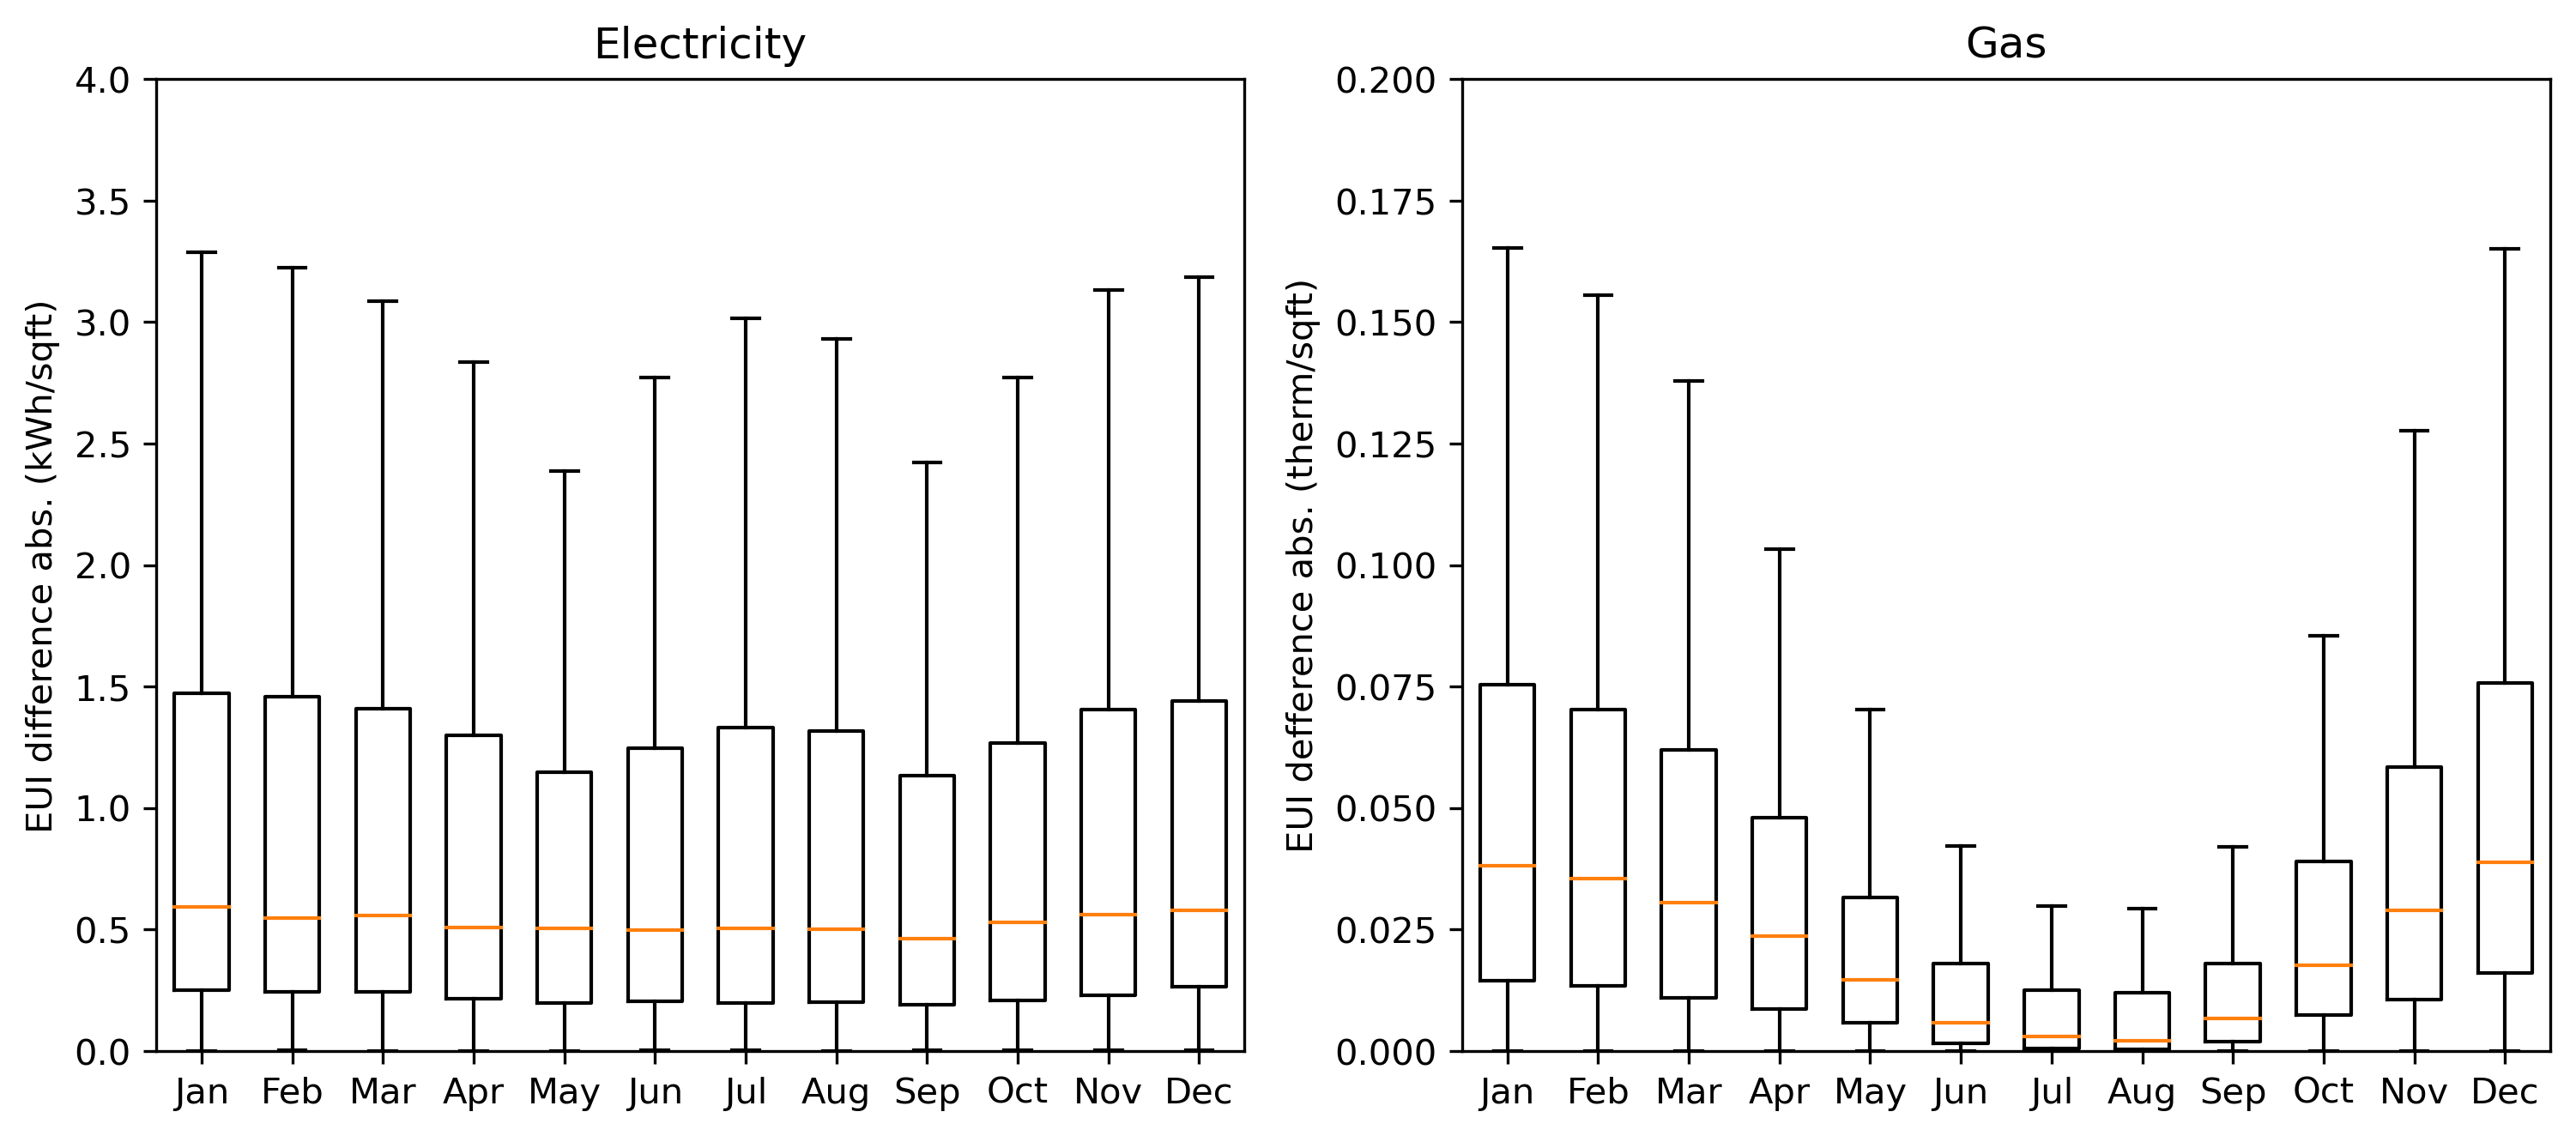

In [52]:
gas_diff_columns = ['Jan_gas_diff', 'Feb_gas_diff', 'Mar_gas_diff', 'Apr_gas_diff',
                              'May_gas_diff', 'Jun_gas_diff', 'Jul_gas_diff', 'Aug_gas_diff',
                              'Sep_gas_diff', 'Oct_gas_diff', 'Nov_gas_diff', 'Dec_gas_diff']
elec_diff_columns = ['Jan_elec_diff', 'Feb_elec_diff', 'Mar_elec_diff', 'Apr_elec_diff',
                              'May_elec_diff', 'Jun_elec_diff', 'Jul_elec_diff', 'Aug_elec_diff',
                              'Sep_elec_diff', 'Oct_elec_diff', 'Nov_elec_diff', 'Dec_elec_diff']



fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5), dpi = 300)

axes[0].boxplot(df_CBSA_UrbanBEM[elec_diff_columns].T, widths=0.6, showfliers = False)
axes[1].boxplot(df_CBSA_UrbanBEM[gas_diff_columns].T, widths=0.6, showfliers = False)

axes[0].set_xticklabels(months)
axes[1].set_xticklabels(months)

axes[0].set_ylim(0, 4)
axes[1].set_ylim(0, 0.2)

axes[0].set_ylabel('EUI difference abs. (kWh/sqft)')
axes[1].set_ylabel('EUI defference abs. (therm/sqft)')

axes[0].set_title('Electricity')
axes[1].set_title('Gas')

In [ ]:
month_key = [['jan', 'Jan'], ['apr', 'Apr'], ['jul', 'Jul'], ['oct', 'Oct']]
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (12,25))

for i in range(4):
    df_CBSA_UrbanBEM.plot.scatter(x = month_key[i][0] + '_elec_eui', y = month_key[i][1] + '_Electricity_EUI', ax = axes[i,0])
    df_CBSA_UrbanBEM.plot.scatter(x = month_key[i][0] + '_gas_eui', y = month_key[i][1] + '_Gas_EUI', ax = axes[i,1])
    #axes[0].set_xlim(0, 5)
    axes[i, 0].set_xlabel('CBSA (kWh/sqft)')
    axes[i, 1].set_xlabel('CBSA (therm/sqft)')
    axes[i, 0].set_ylabel('UrbanBEM (kWh/sqft)')
    axes[i, 1].set_ylabel('UrbanBEM (therm/sqft)')
    axes[i, 0].set_title(month_key[i][1] + ' Electricity EUI')
    axes[i, 1].set_title(month_key[i][1] + ' Gas EUI')
    axes[i, 0].set_xlim(0, 6)
    axes[i, 0].set_ylim(0, 6)
    axes[i, 1].set_xlim(0, 0.4)
    axes[i, 1].set_ylim(0, 0.4)
    

In [ ]:
for facility in df_CBSA_UrbanBEM.index.values:
    cbsa_elec_data = df_CBSA_UrbanBEM.loc[[facility], cbsa_elec_columns]
    urbanbem_elec_data = df_CBSA_UrbanBEM.loc[[facility], urbanbem_elec_columns]
    cbsa_gas_data = df_CBSA_UrbanBEM.loc[[facility], cbsa_gas_columns]
    urbanbem_gas_data = df_CBSA_UrbanBEM.loc[[facility], urbanbem_gas_columns]


    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))

    axes[0].plot(months, cbsa_elec_data.values[0], 'r', label = 'CBSA')
    axes[0].plot(months, urbanbem_elec_data.values[0], 'b', label = 'UrbanBEM')
    axes[1].plot(months, cbsa_gas_data.values[0], 'r', label = 'CBSA')
    axes[1].plot(months, urbanbem_gas_data.values[0], 'b', label = 'UrbanBEM')
    axes[0].set_ylabel('EUI (kWh/sqft)')
    axes[1].set_ylabel('EUI (therm/sqft)')
    #axes[0].set_ylim(-2, 6)
    #axes[1].set_ylim(-0.2, 0.3)
    axes[0].set_title(str(facility) + ' Electricity')
    axes[1].set_title(str(facility) + ' Gas')
    axes[0].legend()
    axes[1].legend()
    fig.savefig('./figs/'+str(facility))
    plt.close()

In [ ]:
#primary_building_types = ['Assembly', 'Warehouse', 'Retail/Service', 'Lodging', 
#                          'Grocery', 'Restaurant', 'School', 'Office', 'Other',
#                          'Residential Care', 'Hospital', 'Mixed Commercial']

for facility in df_CBSA_UrbanBEM.index.values:
    
    bldg_type = df_CBSA_UrbanBEM.loc[[facility], ['primary_building_type_facility']].values[0][0]
    cbsa_elec_data = df_CBSA_UrbanBEM.loc[[facility], cbsa_elec_columns]
    urbanbem_elec_data = df_CBSA_UrbanBEM.loc[[facility], urbanbem_elec_columns]
    cbsa_gas_data = df_CBSA_UrbanBEM.loc[[facility], cbsa_gas_columns]
    urbanbem_gas_data = df_CBSA_UrbanBEM.loc[[facility], urbanbem_gas_columns]


    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))

    axes[0].plot(months, cbsa_elec_data.values[0], 'r', label = 'CBSA')
    axes[0].plot(months, urbanbem_elec_data.values[0], 'b', label = 'UrbanBEM')
    axes[1].plot(months, cbsa_gas_data.values[0], 'r', label = 'CBSA')
    axes[1].plot(months, urbanbem_gas_data.values[0], 'b', label = 'UrbanBEM')
    axes[0].set_ylabel('EUI (kWh/sqft)')
    axes[1].set_ylabel('EUI (therm/sqft)')
    #axes[0].set_ylim(-2, 6)
    #axes[1].set_ylim(-0.2, 0.3)
    axes[0].set_title(str(facility) + ' Electricity')
    axes[1].set_title(str(facility) + ' Gas')
    axes[0].legend()
    axes[1].legend()
    
    path = './figs/'+bldg_type
    if os.path.exists(path) == False:
        os.mkdir(path)
    
    fig.savefig(path + '/' + str(facility))
    plt.close()

In [ ]:
schedule_all = {}

for fname in os.listdir('schedules'):
    df = pd.read_csv('schedules/' + fname)
    key = fname.replace('_schedules.csv','')
    add = {str(key): {'bldg_electric_equipment_sch': df.bldg_electric_equipment_sch.values.sum()/12., 
                      'bldg_gas_equipment_sch': df.bldg_gas_equipment_sch.values.sum()/12., 
                      'bldg_light_sch': df.bldg_light_sch.values.sum()/12.}}
    
    schedule_all.update(add)

In [ ]:
import json
json_object = json.dumps(schedule_all, indent=4) 
# Writing to sample.json
with open("total_schedule.json", "w") as outfile:
    outfile.write(json_object)

In [ ]:
df_input = pd.read_csv('standardized_model_inputs_cbsa_06.15.2022.csv').set_index(['building_name'])
df_input['lpd(W/ft2)_old'] = df_input['lpd(W/ft2)']
df_input['plug_load_density(W/ft2)_old'] = df_input['plug_load_density(W/ft2)']
df_input['gas_equipment_load(W)_old'] = df_input['gas_equipment_load(W)']
f_lpd_building_type = open('lpd_building_type.json', encoding='utf-8')
data_lpd_building_type = json.load(f_lpd_building_type)

for facility in df_CBSA_UrbanBEM.index.values:
    
    bldg_type = df_CBSA_UrbanBEM.loc[[facility], ['primary_building_type_facility']].values[0][0]
    cbsa_elec_data = df_CBSA_UrbanBEM.loc[[facility], cbsa_elec_columns]
    urbanbem_elec_data = df_CBSA_UrbanBEM.loc[[facility], urbanbem_elec_columns]
    cbsa_gas_data = df_CBSA_UrbanBEM.loc[[facility], cbsa_gas_columns]
    urbanbem_gas_data = df_CBSA_UrbanBEM.loc[[facility], urbanbem_gas_columns]
    building_area = df_CBSA_UrbanBEM.loc[[facility], 'total_building_area']
    
    # set the adjustment threshold as 0.1 kWh/sqft difference in electricity and calculate the electric load to be added
    if abs(cbsa_elec_data.values.min() - urbanbem_elec_data.values.min()) > 0.1:
        add_elec = (cbsa_elec_data.values.min() - urbanbem_elec_data.values.min())*3.6e+6 # convert to J/ft2
    else:
        add_elec = 0
    
    # set the adjustment threshold as 0.01 therm/sqft difference in gas and calculate the gas equipment load to be added
    if abs(cbsa_gas_data.values.min() - urbanbem_gas_data.values.min()) > 0.01:
        add_gas = (cbsa_gas_data.values.min() - urbanbem_gas_data.values.min())*1.055e+8*building_area.values[0]/schedule_all[str(facility)]['bldg_gas_equipment_sch']/3600 # convert to W
    else:
        add_gas = 0

    #print(facility, add_elec)
    # load lpd, plug load density, gas equipment info from std inputs
    lighting = df_input.loc[facility, ['lpd(W/ft2)']].values[0]*schedule_all[str(facility)]['bldg_light_sch']*3600
    plug_load = df_input.loc[facility, ['plug_load_density(W/ft2)']].values[0]*schedule_all[str(facility)]['bldg_electric_equipment_sch']*3600
    bldg_type = df_input.loc[facility, ['building_area_type']].values[0]
    gas_load = df_input.loc[facility, ['gas_equipment_load(W)']].values[0]
    
    # new gas load after adjustment
    new_gas_load = max(0, add_gas + gas_load)
    lpd_std_l = data_lpd_building_type[bldg_type]['lpd'] * (1-0.7)*schedule_all[str(facility)]['bldg_light_sch']*3600
    
    if lighting <= lpd_std_l and add_elec > 0.:
        if add_elec < lpd_std_l - lighting:
            # add all to LPD, no change on plug load density
            new_lpd = add_elec/schedule_all[str(facility)]['bldg_light_sch']/3600
            new_pld = df_input.loc[facility, ['plug_load_density(W/ft2)']].values[0]
        else:
            # add LPD to 30% of 90.1 AppG level, and then add plug load density accordingly
            new_lpd = lpd_std_l/schedule_all[str(facility)]['bldg_light_sch']/3600
            new_pld = (add_elec - lpd_std_l)/schedule_all[str(facility)]['bldg_electric_equipment_sch']/3600 + df_input.loc[facility, ['plug_load_density(W/ft2)']].values[0]
    elif add_elec >= 0.:
        # increase plug load density
        new_lpd = df_input.loc[facility, ['lpd(W/ft2)']].values[0]
        new_pld = add_elec/schedule_all[str(facility)]['bldg_electric_equipment_sch']/3600 + df_input.loc[facility, ['plug_load_density(W/ft2)']].values[0]
    elif add_elec < 0.:
        # decrease plug load density
        new_lpd = df_input.loc[facility, ['lpd(W/ft2)']].values[0]
        new_pld = max(0, add_elec/schedule_all[str(facility)]['bldg_electric_equipment_sch']/3600 + df_input.loc[facility, ['plug_load_density(W/ft2)']].values[0])
    #else:
    #    new_lpd = df_input.loc[facility, ['lpd(W/ft2)']].values[0]
    #    new_pld = df_input.loc[facility, ['plug_load_density(W/ft2)']].values[0]
    
    df_input.loc[facility, ['lpd(W/ft2)']] = new_lpd
    df_input.loc[facility, ['plug_load_density(W/ft2)']] = new_pld
    df_input.loc[facility, ['gas_equipment_load(W)']] = new_gas_load
    
    print(facility, new_lpd, new_pld, new_gas_load)
    print(facility, df_input.loc[facility, ['lpd(W/ft2)_old']].values[0], df_input.loc[facility, ['plug_load_density(W/ft2)_old']].values[0], df_input.loc[facility, ['gas_equipment_load(W)_old']].values[0])



In [ ]:
df_input.to_csv('standardized_model_inputs_cbsa_06.16.2022_calibrated.csv')
